In [37]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


with xr.open_dataset("./Downloads/nbp_Lmon_ELM_TEST_r1i1p1_185001-201012.nc") as da:
    print (da)

<xarray.Dataset>
Dimensions:      (hist_interval: 2, lat: 96, lon: 144, time: 1932)
Coordinates:
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time         (time) object 1850-02-01 00:00:00 ... 2011-01-01 00:00:00
Dimensions without coordinates: hist_interval
Data variables:
    nbp          (time, lat, lon) float32 ...
    time_bounds  (time, hist_interval) object ...
Attributes: (12/25)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   Thu Feb 11 21:23:12 2021: ncat...
    source:                                    Community Land Model CLM4.0
    hostname:                                  cades
    ...                                        ...
    ltype_wetland:  

In [33]:
deltay = 6.371e6 * 180./96  * 3.14/180.
deltax = 6.371e6 * 360./144 * 3.14/180. * np.cos(da.lat)
UntCov = 1.e-12  # kg -> Pg

monlen = da.time.dt.days_in_month

danpp = da.nbp * deltax * deltay * UntCov * 86400. * monlen

In [34]:
nppgbl= danpp.groupby('time.year').sum(dim=('time', 'lat', 'lon'))

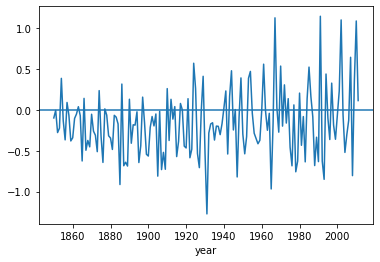

In [35]:
fig, ax = plt.subplots()
nppgbl.plot(ax=ax)
ax.axhline(y=0)

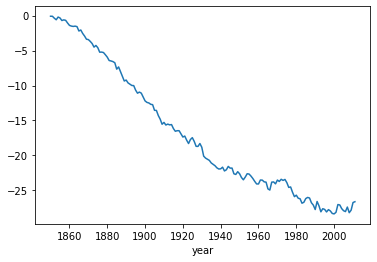

In [36]:
nppgbl.cumsum().plot()